# Equilibrium fractions

This IPython notebook shows some plots of the equilibrium fractions which were extracted from the difference maps.

In [1]:
%pylab inline
import pandas as pd
color_set = cm.gist_earth(linspace(0.2, 0.9, 4))

Populating the interactive namespace from numpy and matplotlib


## Equilibrium fractions in ampicillin (no inhibitor)

In [2]:
data = pd.read_csv('./data/equilibrium_fractions_ampicillin_no_inhibitor.csv')

In [3]:
data

,dilution,ampicillin,feq #1,feq #2,feq #3
0,100,0,0.000076,0.003203,NaN
1,100,3,NaN,NaN,NaN
2,100,15,0.097320,0.108800,0.117500
3,100,50,0.191600,0.194700,0.227700
4,100,100,0.394000,0.332600,0.428100
5,100,125,0.513000,0.357400,0.545400
6,100,150,0.676300,0.610100,0.624300
7,100,200,0.984800,0.749200,0.938800
8,200,0,-0.000253,0.003337,0.001448
9,200,3,NaN,NaN,0.038930


(-0.05, 1.05)

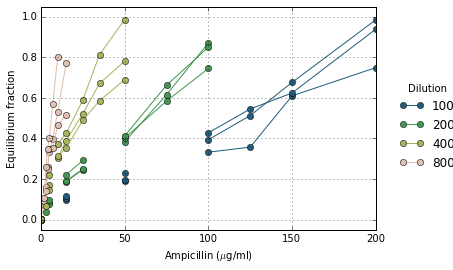

In [4]:
data = pd.read_csv('./data/equilibrium_fractions_ampicillin_no_inhibitor.csv')
data['dilution'] = data['dilution'].astype(int)
data = data.pivot('ampicillin', 'dilution')

# amp_feq.pivot('ampicillin', 'dilution').plot(marker='o')

fig = figure()
ax = subplot(111)

data['feq #1'].plot(marker='o', ax=ax, legend=False, color=color_set)
lines, labels = ax.get_legend_handles_labels()
data['feq #2'].plot(marker='o', ax=ax,legend=False, color=color_set)
data['feq #3'].plot(marker='o', ax=ax, legend=False, color=color_set)
fig.legend(lines, labels, loc='center left', bbox_to_anchor=(0.90, 0.5), frameon=False, title='Dilution')
xlabel('Ampicillin ($\mu $g/ml)')
ylabel('Equilibrium fraction')
ylim(-0.05, 1.05)

## Equilibrium fractions in ampicillin and tazobactam

In [12]:
data = pd.read_csv('./data/equilibrium_fractions_ampicillin_with_tazobactam.csv')
# convert ampicillin concentration to integer value (just for legend)
data['ampicillin (ug/ml)'] = data['ampicillin (ug/ml)'].astype(int)
data = data.pivot_table(['mean feq'], index='tazobactam (ug/ml)', columns=['ampicillin (ug/ml)'])
data.columns = data.columns.droplevel(0)

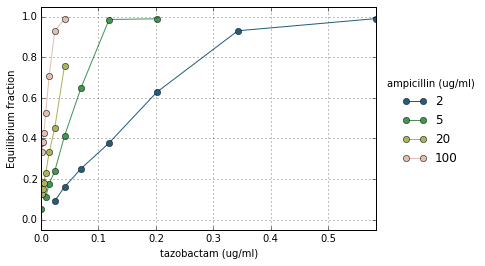

In [13]:
data.plot(marker='o', color=color_set)
legend(loc='center left', bbox_transform=gcf().transFigure, 
       bbox_to_anchor=(0.9, 0.5), frameon=False, title='ampicillin (ug/ml)')
ylim(-0.05, 1.05)
ylabel('Equilibrium fraction')